<a href="https://colab.research.google.com/github/SridharaniKatipally/pravaah-2024/blob/main/pravaah_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nltk spacy scikit-learn textblob gensim pandas matplotlib seaborn


In [ ]:
import pandas as pd
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Read reviews from a CSV file
df = pd.read_csv('/content/output.csv')

# Display the first few rows to verify
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [ ]:

print("Columns in the DataFrame:", df.columns)

Columns in the DataFrame: Index([' Review', 'Liked'], dtype='object')


In [ ]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Load spacy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    # Lowercasing and stopword removal
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words and word.isalnum()]
    return ' '.join(tokens)

# Ensure the column name matches
if 'Review' in df.columns:
    df['cleaned_review'] = df['Review'].apply(preprocess_text)
else:
    print("Column 'Review' not found in the DataFrame. Using the first column as the review text.")
    df['cleaned_review'] = df.iloc[:, 0].apply(preprocess_text)

print(df['cleaned_review'])


Column 'Review' not found in the DataFrame. Using the first column as the review text.
0                                        wow loved place
1                                             crust good
2                                    tasty texture nasty
3      stopped late may bank holiday rick steve recom...
4                            selection menu great prices
                             ...                        
995                    think food flavor texture lacking
996                              appetite instantly gone
997                      overall impressed would go back
998    whole experience underwhelming think go ninja ...
999    wasted enough life poured salt wound drawing t...
Name: cleaned_review, Length: 1000, dtype: object


In [ ]:
# Define aspects manually
aspects = ['good', 'loved', 'ambiance', 'price','tasty']

def extract_aspects(text):
    doc = nlp(text)
    extracted_aspects = [aspect for aspect in aspects if aspect in text]
    return extracted_aspects


In [ ]:
# Apply aspect extraction
df['aspects'] = df['cleaned_review'].apply(extract_aspects)

print(df[['cleaned_review', 'aspects']].head())

                                      cleaned_review  aspects
0                                    wow loved place  [loved]
1                                         crust good   [good]
2                                tasty texture nasty  [tasty]
3  stopped late may bank holiday rick steve recom...  [loved]
4                        selection menu great prices  [price]


In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [ ]:
# Get sentiment for each review
df['sentiment'] = df['cleaned_review'].apply(get_sentiment)
print(df[['cleaned_review', 'sentiment']].head())


                                      cleaned_review  sentiment
0                                    wow loved place        0.4
1                                         crust good        0.7
2                                tasty texture nasty       -1.0
3  stopped late may bank holiday rick steve recom...        0.2
4                        selection menu great prices        0.8


In [ ]:
# Check if 'aspects' column exists
if 'aspects' in df.columns:
    # Create a new DataFrame to store aspect sentiment
    aspect_sentiment = []

    for index, row in df.iterrows():
        for aspect in row['aspects']:
            aspect_sentiment.append({
                'aspect': aspect,
                'sentiment': row['sentiment']
            })

    aspect_df = pd.DataFrame(aspect_sentiment)
    print(aspect_df.head())

  aspect  sentiment
0  loved        0.4
1   good        0.7
2  tasty       -1.0
3  loved        0.2
4  price        0.8


In [ ]:
    # Aggregate and visualize
    aspect_summary = aspect_df.groupby('aspect').mean().reset_index()
    print(aspect_summary)


     aspect  sentiment
0  ambiance   0.531190
1      good   0.575531
2     loved   0.599500
3     price   0.228107
4     tasty   0.122727


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC  # Example classifier, choose based on your preference

# Replace with the actual path to your CSV file
file_path = '/content/output.csv'

# Read reviews from a CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to verify
print(df.head())

# Check column names to ensure they match your CSV structure
print("Columns in the DataFrame:", df.columns)

# Adjust column names to remove leading spaces if present
df.columns = df.columns.str.strip()

# Ensure 'Review' and 'Liked' columns exist in your DataFrame
if 'Review' not in df.columns or 'Liked' not in df.columns:
    raise ValueError("Columns 'Review' and 'Liked' not found in the DataFrame.")

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fit and transform the vectorizer on the review data
X = vectorizer.fit_transform(df['Review'])  # Use 'Review' column for text data

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Liked'], test_size=0.2, random_state=42)

# Initialize sentiment classifier (SVM example)
classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Predict sentiment labels for the test set
predictions = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Overall Accuracy:", accuracy)






                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1
Columns in the DataFrame: Index([' Review', 'Liked'], dtype='object')
Overall Accuracy: 0.81


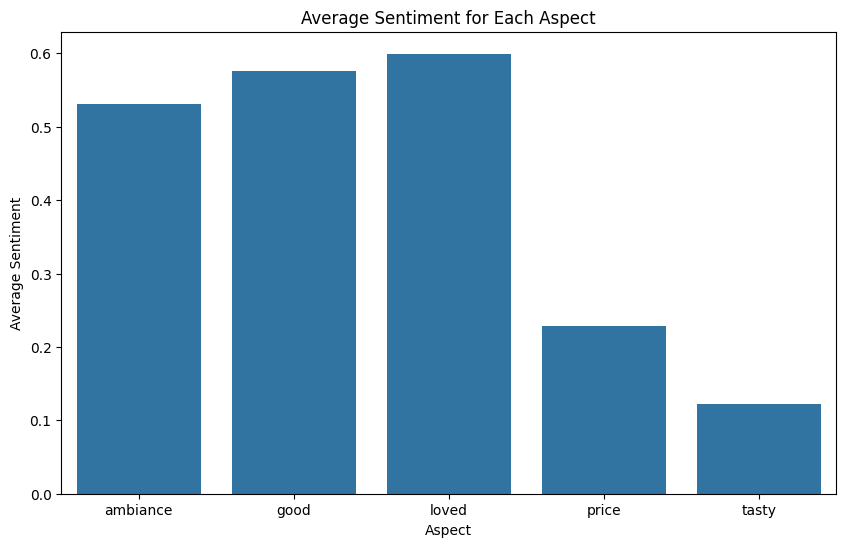

In [ ]:
    # Visualization
    plt.figure(figsize=(10, 6))
    sns.barplot(x='aspect', y='sentiment', data=aspect_summary)
    plt.title('Average Sentiment for Each Aspect')
    plt.xlabel('Aspect')
    plt.ylabel('Average Sentiment')
    plt.show()
